In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("xy_data/ductility_dos_input.csv")
print("Shape of the dataset is: ", data.shape)

data.head()

Shape of the dataset is:  (238, 12)


,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature,Ductility
0,-2.128222,-0.111861,-0.144219,-0.298899,-0.172572,0.289257,0.011619,0.026314,0.030973,8.269839e-15,25.0,12.70
1,-2.168256,-0.145037,-0.125630,-0.258841,-0.163676,0.262390,0.009980,0.015516,0.072297,8.269839e-15,25.0,10.51
2,-2.204076,-0.174720,-0.108997,-0.223001,-0.155717,0.238351,0.008514,0.005855,0.109271,8.269839e-15,25.0,6.83
3,-2.291998,-0.247580,-0.068171,-0.135028,-0.136180,0.179345,0.004915,-0.017860,0.200027,8.269839e-15,25.0,0.94
4,-2.236314,-0.201435,-0.094027,-0.190744,-0.148553,0.216715,0.007194,-0.002841,0.142548,8.269839e-15,25.0,2.00


In [3]:
print(data.shape)

# Function to detect and remove outliers for each column separately
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where the value in the column is an outlier
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers
df_cleaned = remove_outliers(data)
print(df_cleaned.shape)
df_cleaned.head()

(238, 12)
(141, 12)


,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature,Ductility
4,-2.236314,-0.201435,-0.094027,-0.190744,-0.148553,0.216715,0.007194,-0.002841,0.142548,8.269839e-15,25.0,2.00
5,-2.083183,-0.074538,-0.165133,-0.343963,-0.182579,0.319483,0.013463,0.038462,-0.015517,8.269839e-15,25.0,25.90
8,1.935686,-0.139797,-0.066622,-0.024199,0.019153,0.278043,-0.046675,0.060347,0.172245,8.269839e-15,25.0,48.88
14,0.109777,0.161555,-0.128763,-0.136615,-0.072681,-0.031729,-0.026491,0.142243,0.194402,8.269839e-15,25.0,2.22
15,0.109777,0.161555,-0.128763,-0.136615,-0.072681,-0.031729,-0.026491,0.142243,0.194402,8.269839e-15,1000.0,48.86


In [4]:
pc_columns = [col for col in df_cleaned.columns if col.startswith('scaled_pc')]
all_features = pc_columns + ['test_temperature']

# Step 3: Prepare Features and Target
X = df_cleaned[all_features]
y = df_cleaned['Ductility']

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=all_features)
X_scaled.head()

,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature
0,0.000000,0.201193,0.507125,0.323891,0.178733,0.699636,0.657918,0.176404,0.683124,1.151737e-28,0.157213
1,0.025882,0.286191,0.343615,0.062216,0.040523,0.937010,0.684540,0.288969,0.237783,5.679799e-29,0.157213
2,0.705145,0.242480,0.570146,0.608324,0.859944,0.841290,0.429128,0.348614,0.766792,1.388395e-28,0.157213
3,0.396533,0.444330,0.427250,0.416335,0.486920,0.125776,0.514851,0.571809,0.829217,1.372618e-28,0.157213
4,0.396533,0.444330,0.427250,0.416335,0.486920,0.125776,0.514851,0.571809,0.829217,1.372618e-28,0.678938


<AxesSubplot: >

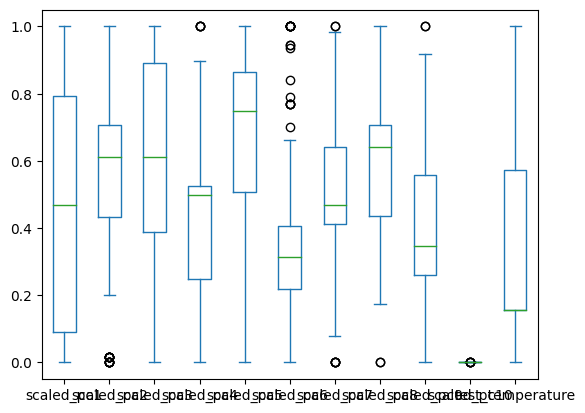

In [6]:
X_scaled.plot.box()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Initialize the Random Forest Regressor
rf_ys = RandomForestRegressor(random_state=42)

# Fit RandomizedSearchCV to the training data
rf_ys.fit(X_train, y_train)

# Predict on the test set
y_pred_ys = rf_ys.predict(X_test)

# Evaluate the model
mae_ys = mean_absolute_error(y_test, y_pred_ys)
mse_ys = mean_squared_error(y_test, y_pred_ys)
rmse_ys = np.sqrt(mse_ys)
r2_ys = r2_score(y_test, y_pred_ys)

print(f'Yield Strength Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae_ys}')
print(f'Mean Squared Error (MSE): {mse_ys}')
print(f'Root Mean Squared Error (RMSE): {rmse_ys}')
print(f'R^2 Score: {r2_ys}')

Yield Strength Model Evaluation:
Mean Absolute Error (MAE): 6.805027739694417
Mean Squared Error (MSE): 104.31012310705475
Root Mean Squared Error (RMSE): 10.213232745172057
R^2 Score: 0.7034691412656671


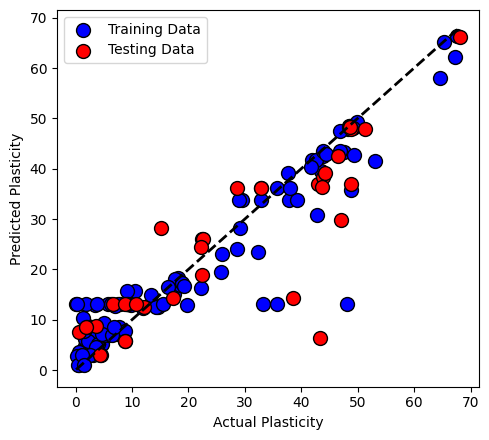

In [10]:
# Predict on the training data as well
y_train_pred_ys = rf_ys.predict(X_train)

# Create a scatter plot to compare actual vs. predicted for both training and testing data
plt.figure(figsize=(5, 4.5))

# Plot training data
plt.scatter(y_train, y_train_pred_ys, color='blue', alpha=1, label='Training Data', edgecolor='k', s=100)

# Plot testing data
plt.scatter(y_test, y_pred_ys, color='red', alpha=1, label='Testing Data', edgecolor='k', s=100)

# Plot the ideal prediction line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'k--', lw=2)

# Customize the plot
plt.xlabel('Actual Plasticity')
plt.ylabel('Predicted Plasticity')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Import regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, 
    HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor
)
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
    ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# Extended list of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(random_state=42),
    "RANSAC Regressor": RANSACRegressor(random_state=42),
    "TheilSen Regressor": TheilSenRegressor(random_state=42),
    "PLS Regression": PLSRegression(n_components=2),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

In [13]:
def evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test):
    """
    Train and evaluate multiple regression models and visualize actual vs predicted values
    with R² scores displayed in subplots. Also includes training and testing MAE, MSE, RMSE.

    Parameters:
    - models: Dictionary of regression model names and their corresponding instances.
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Testing data and labels.

    Returns:
    - DataFrame with model evaluation metrics.
    """
    results = []
    n_models = len(models)
    n_cols = 3  # Number of subplots per row
    n_rows = int(np.ceil(n_models / n_cols))  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for idx, (name, model) in enumerate(models.items()):
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate the model
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Training metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        # Testing metrics
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        # Store results
        results.append({
            "Model": name,
            "Train MAE": train_mae,
            "Train R²": train_r2,
            
            "Test MAE": test_mae,
            "Test R²": test_r2,
            
            "Train MSE": train_mse,
            "Train RMSE": train_rmse,
            "Test MSE": test_mse,
            "Test RMSE": test_rmse,
        })

        # Plot Actual vs Predicted in the subplot
        ax = axes[idx]
        ax.scatter(y_train, y_train_pred, color="blue", alpha=1, label="Training Data", edgecolor="k")
        ax.scatter(y_test, y_test_pred, color="red", alpha=1, label="Testing Data", edgecolor="k")
        ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                "k--", lw=1)
        ax.set_title(f"{name}\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}", fontsize=10)
        ax.set_xlabel("Actual Plasticity")
        ax.set_ylabel("Predicted Plasticity")
        ax.legend()

    # Turn off unused subplots
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Return results as a sorted DataFrame for better analysis
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Test R²", ascending=False)

    return results_df

c:\Users\Tohid\anaconda3\envs\regression\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


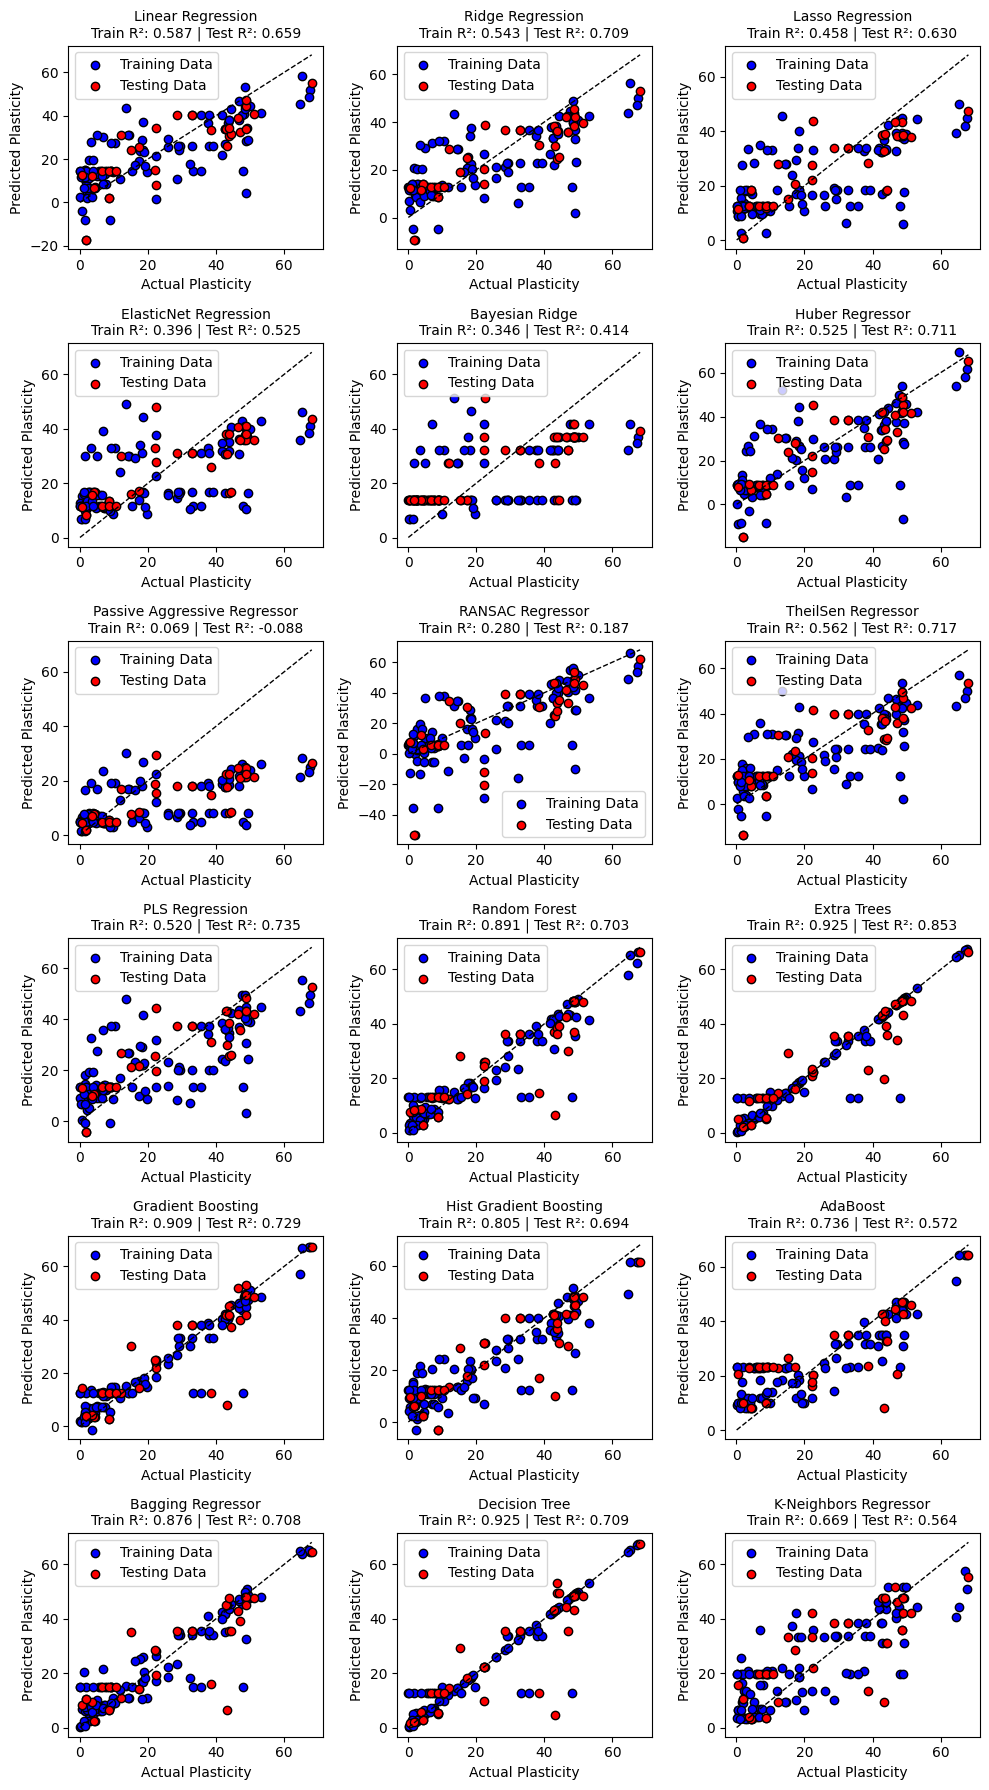

In [14]:
# Evaluate and visualize all models
results_df = evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test)

In [15]:
results_df = results_df.round(3)
results_df.to_csv("results/ductility_dos_results.csv", index=False)
results_df

,Model,Train MAE,Train R²,Test MAE,Test R²,Train MSE,Train RMSE,Test MSE,Test RMSE
11,Extra Trees,2.005,0.925,4.720,0.853,27.765,5.269,51.795,7.197
9,PLS Regression,10.437,0.520,7.964,0.735,177.415,13.320,93.123,9.650
12,Gradient Boosting,3.433,0.909,5.972,0.729,33.612,5.798,95.433,9.769
8,TheilSen Regressor,9.448,0.562,8.512,0.717,161.814,12.721,99.501,9.975
5,Huber Regressor,9.249,0.525,8.047,0.711,175.567,13.250,101.627,10.081
16,Decision Tree,2.005,0.925,5.808,0.709,27.765,5.269,102.224,10.111
1,Ridge Regression,10.276,0.543,8.750,0.709,168.816,12.993,102.475,10.123
15,Bagging Regressor,4.355,0.876,6.928,0.708,45.992,6.782,102.695,10.134
10,Random Forest,3.988,0.891,6.805,0.703,40.318,6.350,104.310,10.213
13,Hist Gradient Boosting,6.236,0.805,7.682,0.694,72.115,8.492,107.745,10.380



Gradient Boosting Model Evaluation:
Training Data - R²: 0.909, MAE: 3.43, MSE: 33.61, RMSE: 5.80
Testing Data  - R²: 0.729, MAE: 5.97, MSE: 95.43, RMSE: 9.77


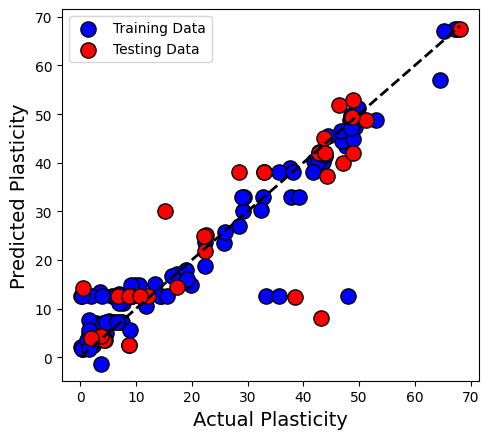

In [16]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred_gb)
mse_train = mean_squared_error(y_train, y_train_pred_gb)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_gb)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred_gb)
mse_test = mean_squared_error(y_test, y_test_pred_gb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_gb)

# Print evaluation metrics
print("\nGradient Boosting Model Evaluation:")
print(f"Training Data - R²: {r2_train:.3f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Data  - R²: {r2_test:.3f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")

# Plot Actual vs. Predicted Values
plt.figure(figsize=(5, 4.5))

# Training data
plt.scatter(y_train, y_train_pred_gb, color='blue', label='Training Data', edgecolor='k', s=120)

# Testing data
plt.scatter(y_test, y_test_pred_gb, color='red', label='Testing Data', edgecolor='k', s=120)

# Ideal Line
min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Customize the plot
plt.xlabel("Actual Plasticity", fontsize=14)
plt.ylabel("Predicted Plasticity", fontsize=14)

plt.legend()
plt.tight_layout()

plt.savefig("figures/gb_model_ductility_actual_vs_predicted_dos_input.png", dpi=500, bbox_inches='tight')
plt.show()

In [17]:
from sklearn.linear_model import Lasso

Lasso Regression Model Evaluation:
Train R²: 0.458
Test R²: 0.630
Mean Absolute Error (MAE): 8.82
Mean Squared Error (MSE): 130.10
Root Mean Squared Error (RMSE): 11.41


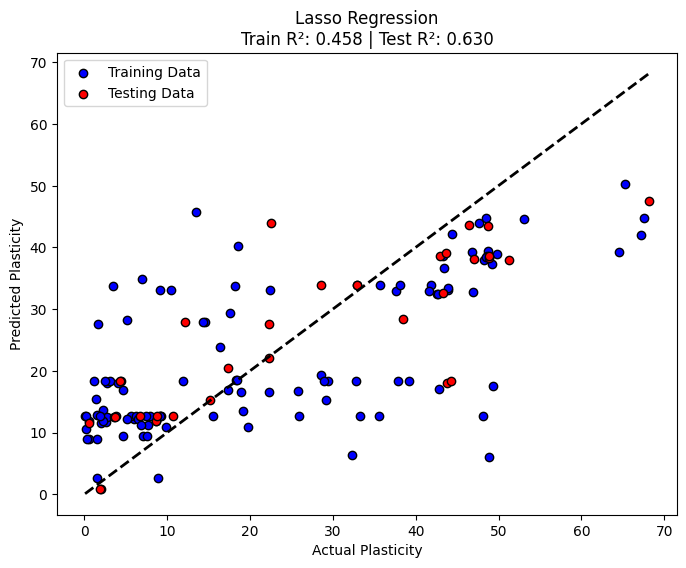

In [18]:
# Define and train Lasso Regression
lasso_model = Lasso(alpha=1, random_state=42)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Lasso Regression Model Evaluation:")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))

# Training data
plt.scatter(y_train, y_train_pred, color="blue", alpha=1, label="Training Data", edgecolor="k")
# Testing data
plt.scatter(y_test, y_test_pred, color="red", alpha=1, label="Testing Data", edgecolor="k")

# Ideal line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         "k--", lw=2)

# Customize the plot
plt.title(f"Lasso Regression\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}")
plt.xlabel("Actual Plasticity")
plt.ylabel("Predicted Plasticity")
plt.legend()
plt.grid(False)
plt.show()

In [19]:
coef = lasso_model.coef_
intercept = lasso_model.intercept_

In [20]:
coef, intercept

(array([-1.46018935, 10.61772025, -0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.02732152]),
 9.678101710758739)